#Capston Project -End to End Machine Learning




**SUPERVISED - REGRESSION**

**Project** - Yes bank stock closing price prediction

**NAME : shivam tiwari**

**Project Summary -**


Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

**GitHub Link -**https://github.com/shivam14796/Yes-bank-stock-closing-price-prediction

**

**Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

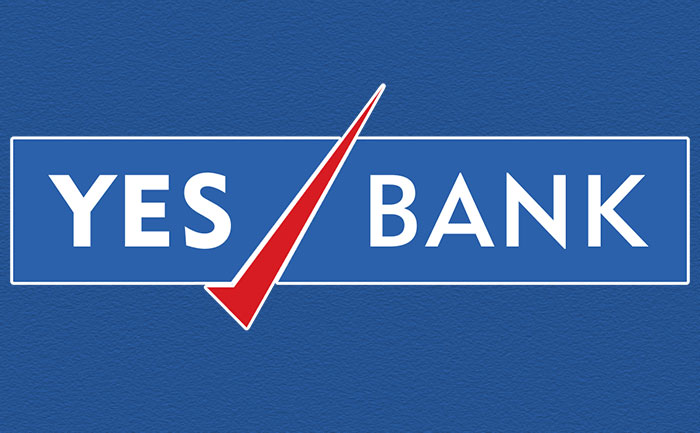

**Project Type - Linear Regression**

**importing libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the Data**

In [ ]:
#Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices (1).csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


**Description of Data**

#Get a basic understanding of the data.

In [ ]:
#length
len(df)

185

In [ ]:
# shape
df.shape

(185, 5)

In [ ]:
#describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Convert Date Column**

In [ ]:
# Convert the 'Date' column to a datetime format.
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

In [ ]:
#list the all columns we do have
col = list(df.columns)

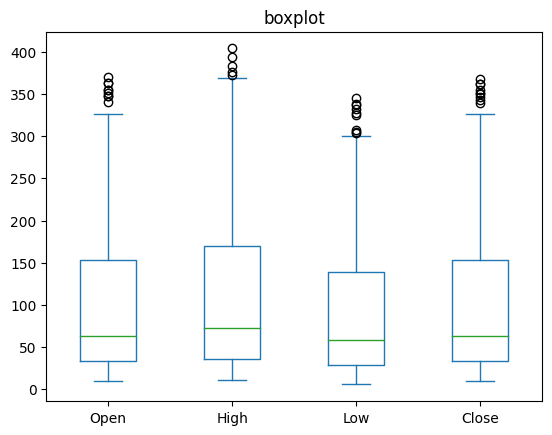

In [ ]:
#Plot the distribution of each column.
ax = df[col].plot(kind='box', title='boxplot')

plt.show()

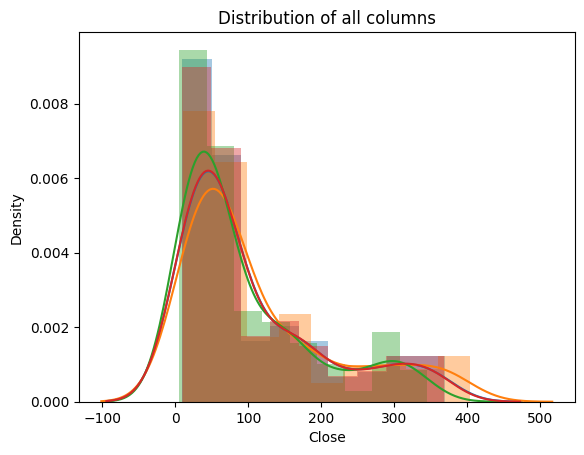

In [ ]:

sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()

**Bivariate Analysis**

**Analyze the relationship between the 'Close' price and other features.**

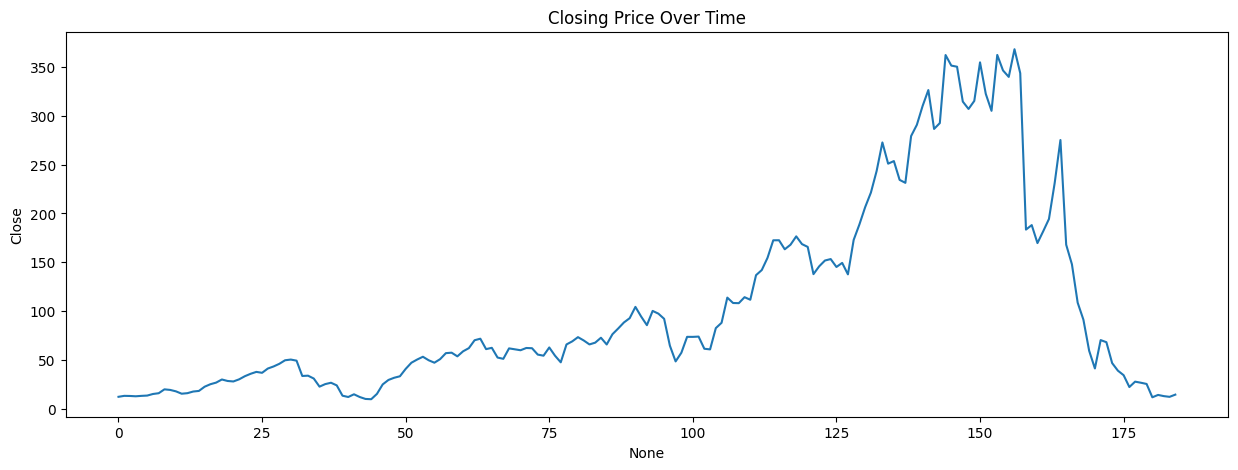

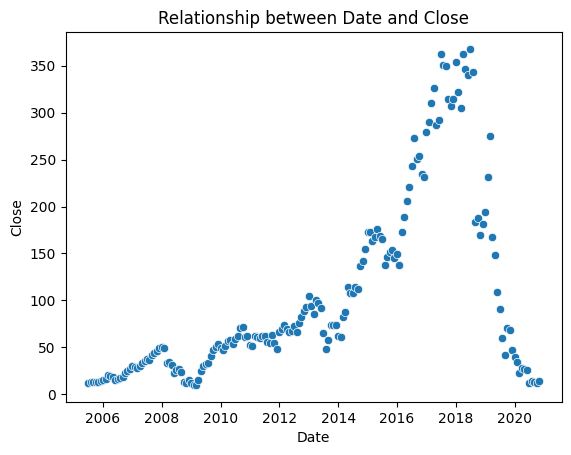

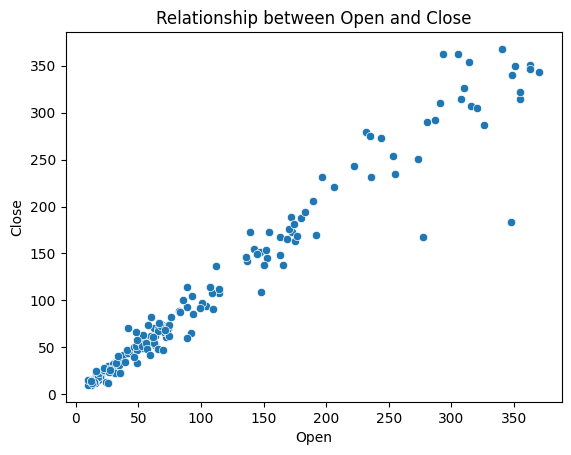

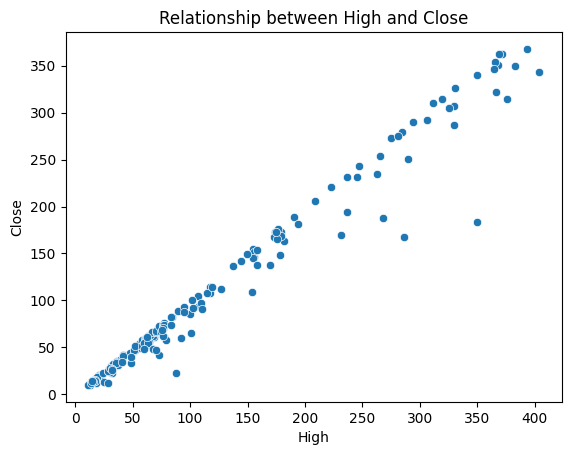

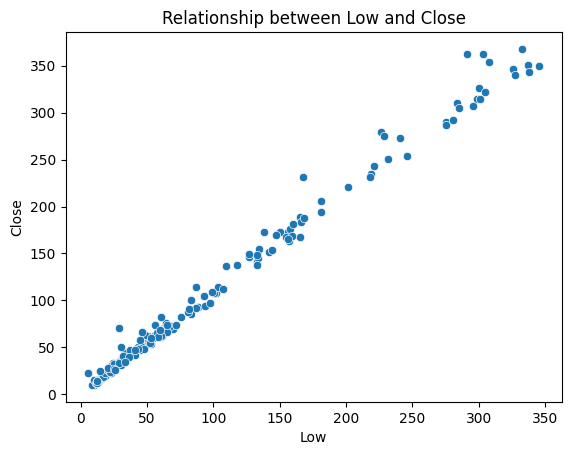

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='Close', data=df)
plt.title('Closing Price Over Time')
plt.show()

for col in df.columns:
    if col != 'Close':
        sns.scatterplot(x=col, y='Close', data=df)
        plt.title(f'Relationship between {col} and Close')
        plt.show()


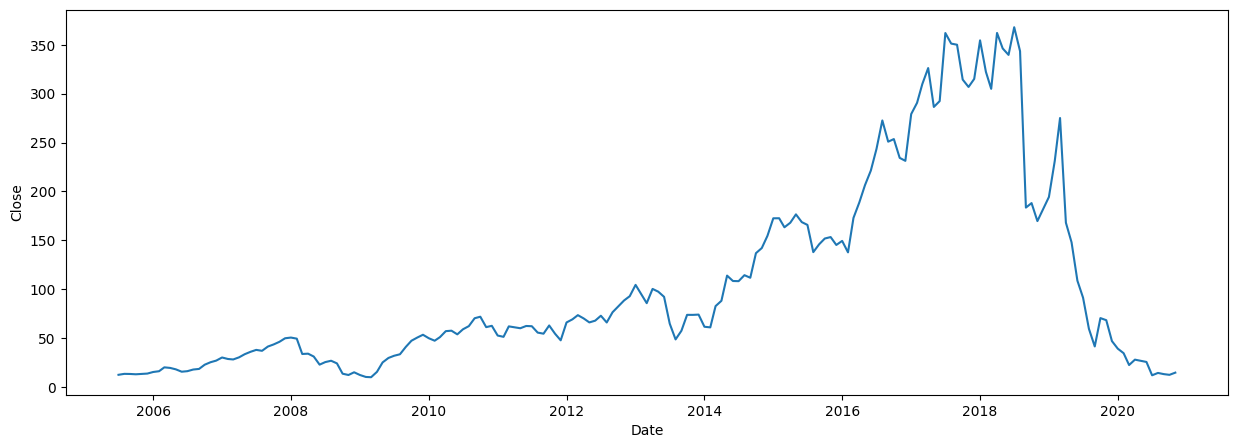

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

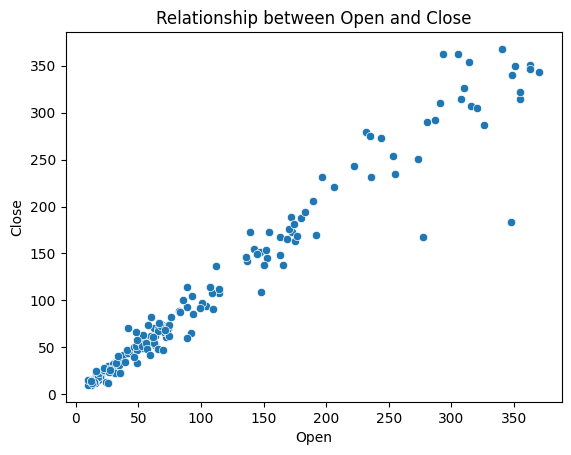

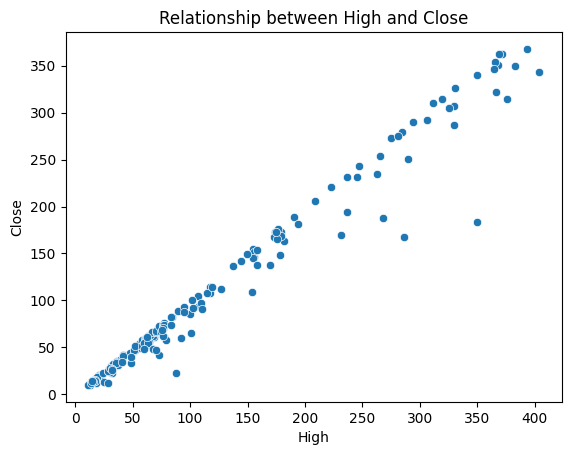

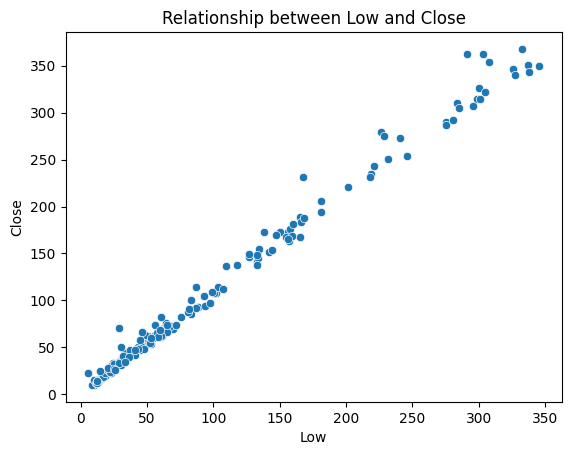

In [ ]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]

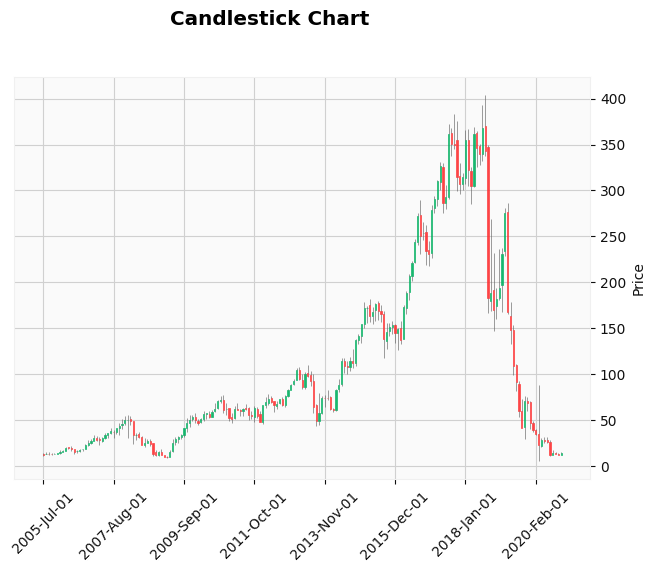

In [ ]:
mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

**Multivariate Analysis**

**Plot a heatmap to visualize correlations.**



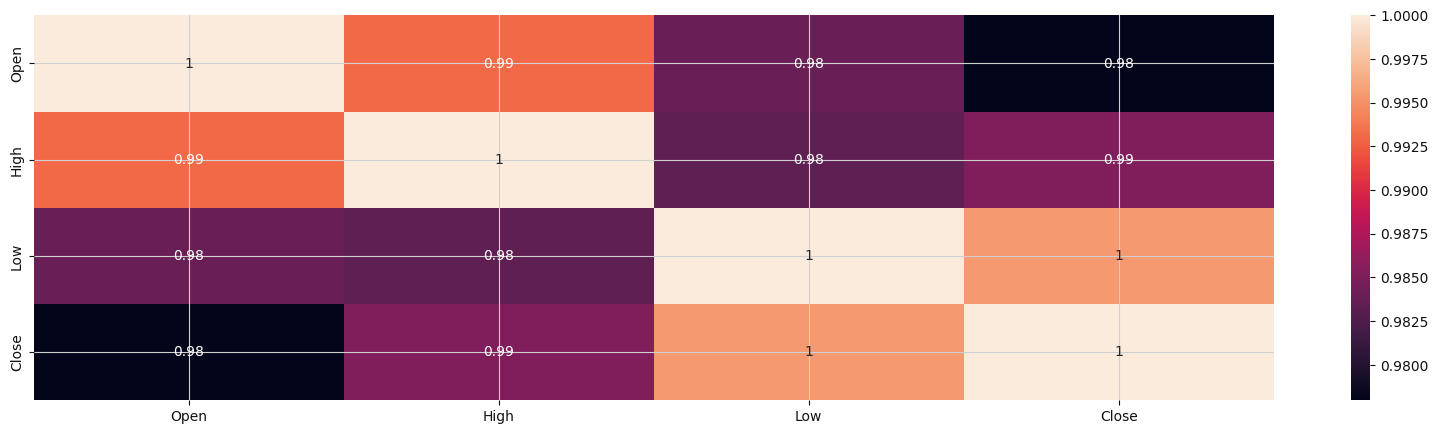

In [ ]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [ ]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [ ]:
cf= df[list(df.columns)]

In [ ]:
df['Close']

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

In [ ]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [ ]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

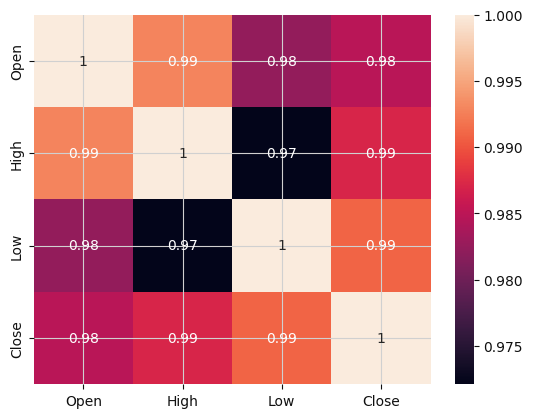

In [ ]:
sns.heatmap(kf.corr(),annot=True)

In [ ]:
col = list(kf.columns)

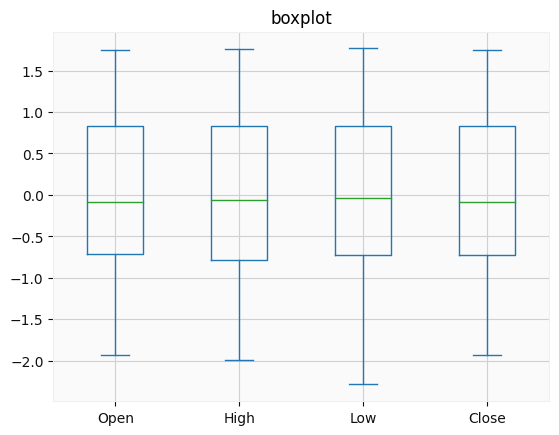

In [ ]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

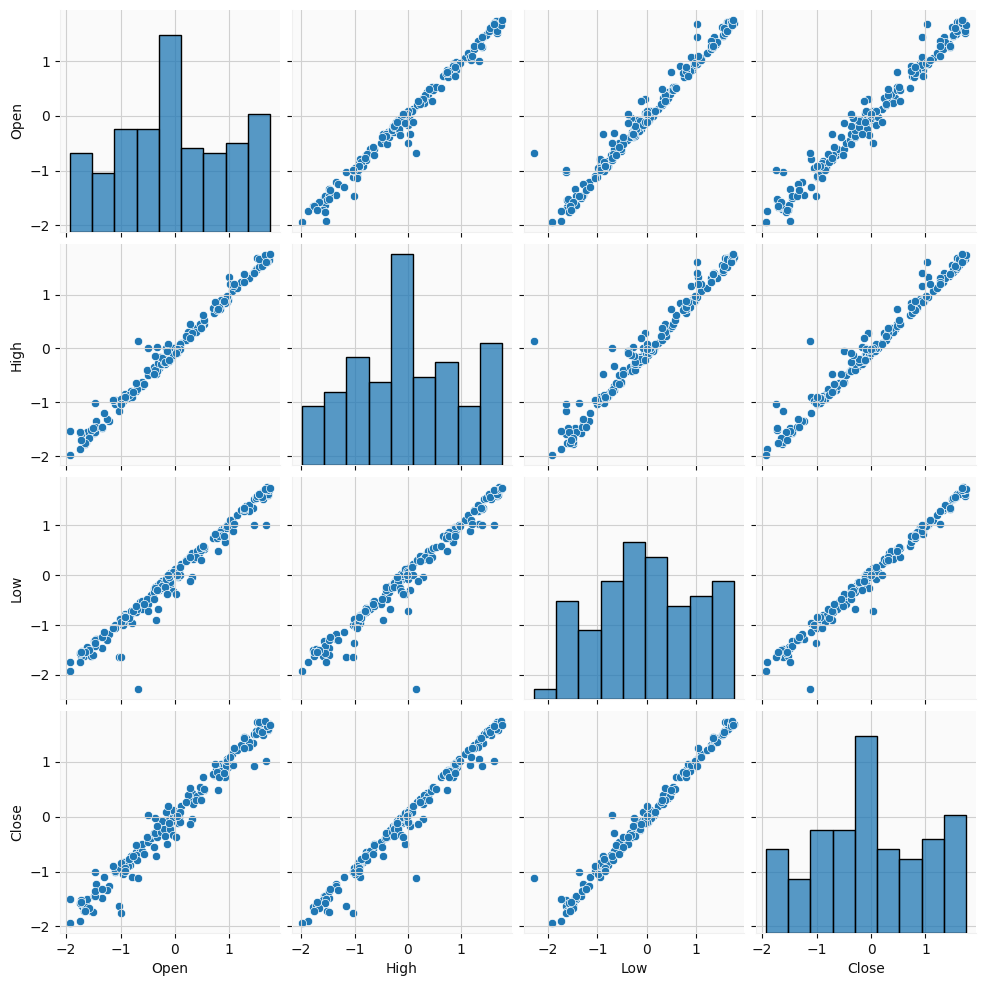

In [ ]:
sns.pairplot(kf)

**Data Preprocessing**

**Power Transformation to Reduce Multicollinearity**

Transform the features using PowerTransformer.

In [ ]:

kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [ ]:
x=df[independent_variable].values

In [ ]:
y=df[dependent_variable].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Linear Regression**

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
linear_r2 = r2_score(y_pred,y_test)

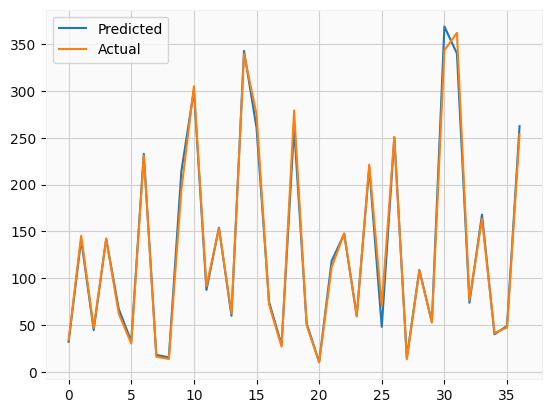

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**K-Nearest Neighbors (KNN):**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
model.best_params_

{'n_neighbors': 2}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
r2_knn = r2_score(y_test,knn_pred)

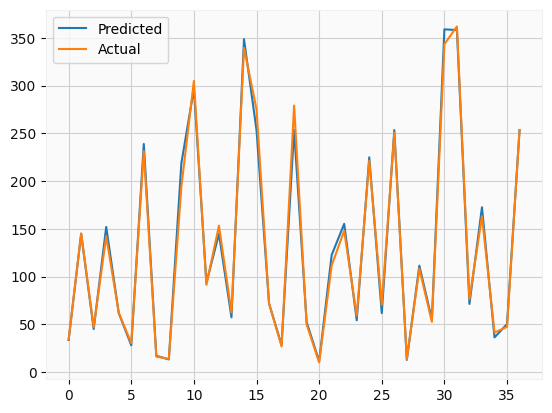

In [ ]:

plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**RandomForest**

In [ ]:

rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [ ]:

rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [ ]:

rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 100}

In [ ]:

rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [ ]:

rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [ ]:

rf_predict_ = rf.predict(x_test)

In [ ]:

rf_r2 = r2_score(y_test,rf_predict_)

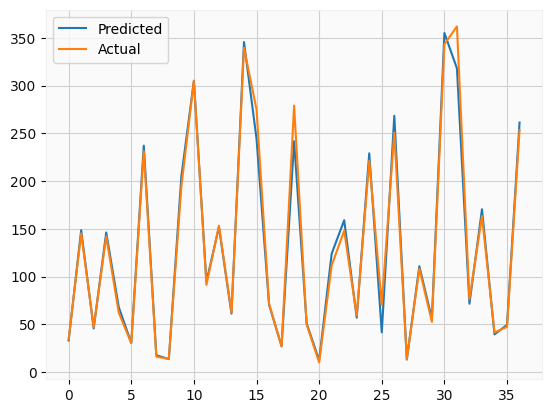

In [ ]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Ridge Regression**

In [ ]:

ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [ ]:

ridge =Ridge(alpha= 100)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [ ]:
y_pred_ridge = ridge.predict(x_test)

In [ ]:

ridge_r2 = r2_score(y_test,y_pred_ridge)

In [ ]:

ridge_r2

0.9930447012730754

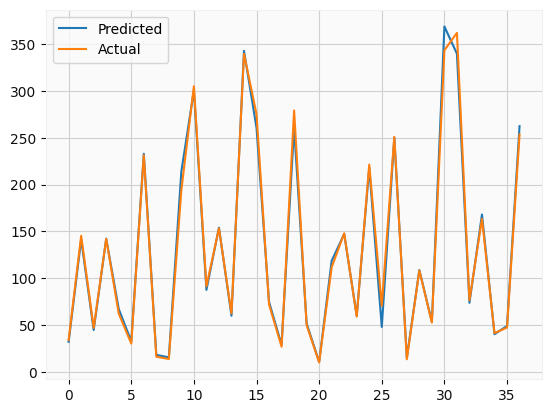

In [ ]:

plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Lasso**

In [ ]:

lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': 1.5}

In [ ]:

lasso =Lasso(alpha= 1.6)

In [ ]:

lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

In [ ]:
lasso_predict = lasso.predict(x_test)

In [ ]:

lasso_r2 = r2_score(lasso_predict,y_test)

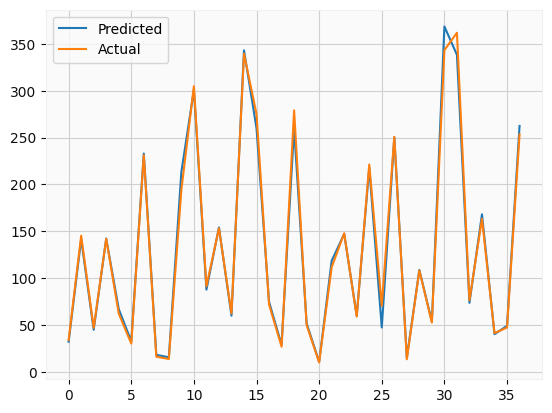

In [ ]:

plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Elasticnet**

In [ ]:

elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [ ]:

elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [ ]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [ ]:

elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [ ]:
elastic_predict = elastic.predict(x_test)

In [ ]:

elastic_r2 = r2_score(elastic_predict,y_test)

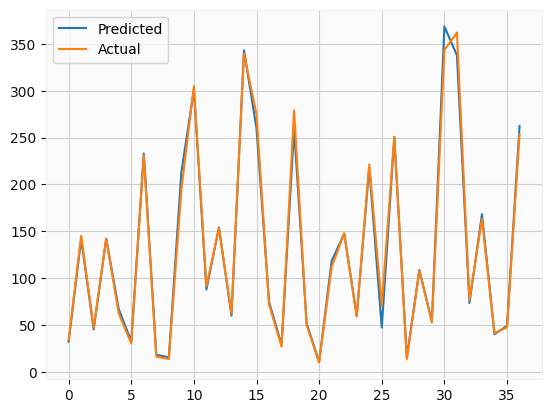

In [ ]:
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Evaluation and Improvement of Model**

In [ ]:
#Compare Model Performance:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})



In [ ]:

Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [ ]:

Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
2,lasso regression,0.992790
3,elastic net regression,0.992704
5,RandomForest Regression,0.984852


**Feature Importance:**

For Random Forest and other applicable models, determine feature importance.

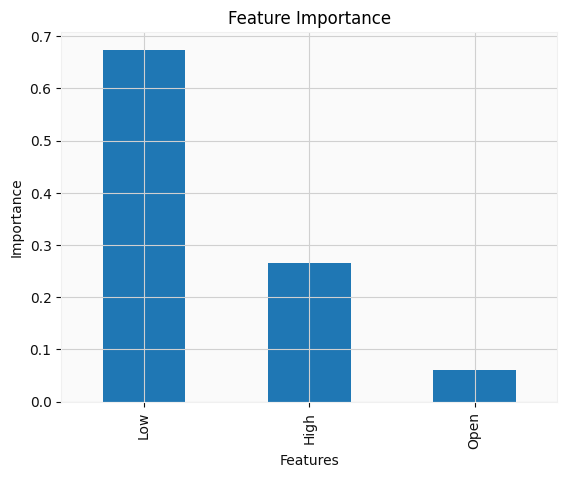

In [ ]:
# Assuming you have already run GridSearchCV and fitted the model
rf_best = rf_model.best_estimator_

# Extract feature importances
feature_importance = pd.Series(rf_best.feature_importances_, index=independent_variable).sort_values(ascending=False)

# Plot feature importances
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


**Conclusions Drawn :**

In [ ]:
#Summarize Findings:
print("Conclusions:")
print("- The dataset contains monthly stock prices of Yes Bank since its inception.")
print("- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.")
print("- No null values or duplicate data were found.")
print("- Despite outliers, they were retained to avoid data loss.")
print("- Applied power transformation to handle positively skewed distribution.")
print("- High correlation between dependent and independent variables indicates a good prediction potential.")
print("- High multicollinearity among independent variables due to small dataset.")
print("- KNN Regressor performed the best with an R2 score of 0.993115.")


Conclusions:
- The dataset contains monthly stock prices of Yes Bank since its inception.
- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.
- No null values or duplicate data were found.
- Despite outliers, they were retained to avoid data loss.
- Applied power transformation to handle positively skewed distribution.
- High correlation between dependent and independent variables indicates a good prediction potential.
- High multicollinearity among independent variables due to small dataset.
- KNN Regressor performed the best with an R2 score of 0.993115.


In [ ]:
#Project Utility for Stakeholders:
print("Utility for Stakeholders:")
print("- Accurate prediction of closing prices can assist investors in making informed decisions.")
print("- Helps in understanding the impact of major events on stock prices.")
print("- Provides a basis for further financial analysis and investment strategies.")


Utility for Stakeholders:
- Accurate prediction of closing prices can assist investors in making informed decisions.
- Helps in understanding the impact of major events on stock prices.
- Provides a basis for further financial analysis and investment strategies.


                                                          ** Thank you**